In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
plt.style.use('fivethirtyeight')

# Demos for Lecture 4b - CS/Stat 118 Fall 2021 


## Census Data

In [6]:
#read census data (available from census.gov: https://www2.census.gov/programs-surveys/popest/datasets/2010-2014/national/asrh/ )
# The data dictionary is here: https://www2.census.gov/programs-surveys/popest/datasets/2010-2014/national/asrh/nc-est2014-alldata.pdf

full = pd.read_csv('./data/nc-est2014-agesex-res.csv')
full

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
1,0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
2,0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
3,0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
4,0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
...,...,...,...,...,...,...,...,...,...
301,2,97,53582,53605,54118,57164,59557,61693,63252
302,2,98,36641,36675,37533,40110,42876,44703,46536
303,2,99,26193,26214,26074,27034,29321,31378,32791
304,2,100,44202,44246,45058,47557,50684,54379,58468


## Data Wrangling: Let's clean things up a bit so the data is more useful

In [7]:
#lets pull out some columns - could use .iloc to save typing, 
#but we're doing it with column names
#with .iloc it would look like this:  partial = full.iloc[:,[0,1,4,8]]
partial = full[['SEX','AGE','POPESTIMATE2010','POPESTIMATE2014' ]]
partial.head()

,SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,0,3951330,3948350
1,0,1,3957888,3962123
2,0,2,4090862,3957772
3,0,3,4111920,4005190
4,0,4,4077552,4003448


In [8]:
#Rename some columns to reduce typing and improve readability
simple= partial.rename(columns = {'POPESTIMATE2010':'2010','POPESTIMATE2014':'2014'})
simple.head()

,SEX,AGE,2010,2014
0,0,0,3951330,3948350
1,0,1,3957888,3962123
2,0,2,4090862,3957772
3,0,3,4111920,4005190
4,0,4,4077552,4003448


In [9]:
#sort simple from oldest to youngest
#simple = simple.sort('AGE', descending=True)
simple = simple.sort_values('AGE',ascending=False)
simple.head(15)

,SEX,AGE,2010,2014
305,2,999,157257573,161920569
101,0,999,309347057,318857056
203,1,999,152089484,156936487
304,2,100,45058,58468
100,0,100,54409,72197
202,1,100,9351,13729
201,1,99,6104,9037
303,2,99,26074,32791
99,0,99,32178,41828
302,2,98,37533,46536


## Okay - let's take a look at that data.   

### - Do you notice anything odd about AGE???
### - What is the encoding of SEX???
### Anything else interesting going on?
#  
#  

In [10]:
#let's get rid of 999 - what about age 100???
no_999 = simple.query('AGE < 999')
no_999.head(10)

,SEX,AGE,2010,2014
304,2,100,45058,58468
100,0,100,54409,72197
202,1,100,9351,13729
201,1,99,6104,9037
303,2,99,26074,32791
99,0,99,32178,41828
302,2,98,37533,46536
98,0,98,47037,60185
200,1,98,9504,13649
301,2,97,54118,63252


In [11]:
#let's subset the data by sex
everyone = no_999.query('SEX == 0').drop(columns=['SEX','2010'])
males = no_999.query('SEX == 1').drop(columns=['SEX','2010'])
females = no_999.query('SEX == 2').drop(columns=['SEX','2010'])

In [12]:
females.head(10)

,AGE,2014
304,100,58468
303,99,32791
302,98,46536
301,97,63252
300,96,89949
299,95,114300
298,94,156525
297,93,200353
296,92,244659
295,91,288866


<BarContainer object of 101 artists>

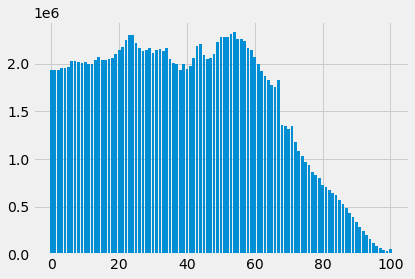

In [13]:
plt.bar(females.AGE, females["2014"])

In [14]:
females.sort_values('2014', ascending = False).head(10)

,AGE,2014
258,54,2331961
257,53,2316131
228,24,2301237
227,23,2298701
255,51,2283261
256,52,2282051
254,50,2279824
259,55,2263367
260,56,2254749
226,22,2244480


In [15]:
males.sort_values('2014', ascending = False).head(10)

,AGE,2014
125,23,2399883
126,24,2391398
124,22,2367842
123,21,2310734
127,25,2295836
122,20,2269570
156,54,2242828
128,26,2240026
121,19,2220790
155,53,2219617


In [16]:
#Lets create a new table of 2014 populations for Females and Males
#Note, this uses a "merge" function, which we will cover later (but is in the cheat sheet!)

males = males.rename(columns = {'2014':'MALES'})
females = females.rename(columns ={'2014':'FEMALES'})
pop_2014 = pd.merge(females,males, on='AGE')
pop_2014.head(10)

,AGE,FEMALES,MALES
0,100,58468,13729
1,99,32791,9037
2,98,46536,13649
3,97,63252,20479
4,96,89949,31235
5,95,114300,42824
6,94,156525,62130
7,93,200353,85980
8,92,244659,109873
9,91,288866,138080


In [17]:
percentage_females = (100 * 
    pop_2014.FEMALES / (pop_2014.MALES 
    + pop_2014.FEMALES))

#Create a new dataframe with a new column '%FEMALE'
counts_and_percentages = pop_2014
counts_and_percentages['%FEMALE'] = percentage_females


In [18]:
counts_and_percentages.head()

,AGE,FEMALES,MALES,%FEMALE
0,100,58468,13729,80.983974
1,99,32791,9037,78.394855
2,98,46536,13649,77.321592
3,97,63252,20479,75.541914
4,96,89949,31235,74.225145


## Visualizing Numerical Data - Line Graphs and Scatter Plots
### Drawn from a fixed Scale
### Ordered
### Differences are typically meaningful

## Line Graphs ##

<AxesSubplot:xlabel='AGE'>

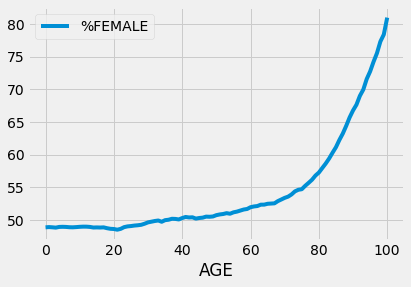

In [19]:
counts_and_percentages.plot('AGE', '%FEMALE')

<AxesSubplot:xlabel='AGE'>

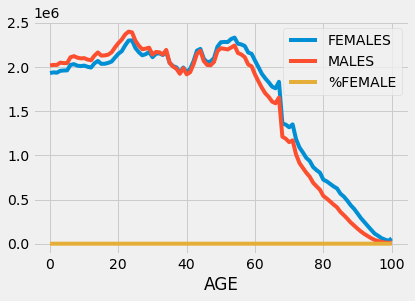

In [20]:
pop_2014.plot('AGE')

## Now stare into the data

In [21]:
birth_year = 2014 - np.arange(100, -1, -1)
birth_year

array([1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

<AxesSubplot:xlabel='BIRTH_YEAR'>

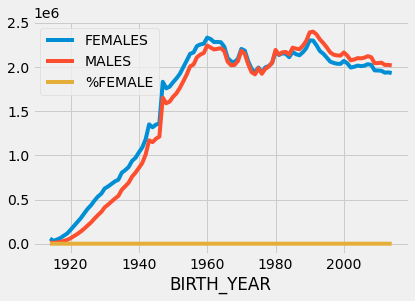

In [22]:
pop_2014_byear = pop_2014
pop_2014_byear['BIRTH_YEAR'] = birth_year
pop_2014_byear = pop_2014_byear.drop(columns=['AGE'])
pop_2014_byear.plot('BIRTH_YEAR')